In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import scale
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/srii mini pro.csv')

In [ ]:
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [ ]:
df.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,86800.000000,86800.000000,86800.000000,86800.000000,86800.000000,83876.000000,86800.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.013494,22.519519,0.291233,0.212732,43.111503,7.769974,0.133102
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [ ]:
print(df['bmi'].isna().sum())


2924


In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyspark.sql import SparkSession
import tensorflow as tf
import pandas as pd
import pyspark.sql as sparksql
spark = SparkSession.builder.appName('stroke').getOrCreate()
dataset = spark.read.csv('/content/drive/MyDrive/srii mini pro.csv', inferSchema=True,header=True)

In [ ]:
dataset.createOrReplaceTempView('table')
# sql query to find the number of people in specific work_type who have had stroke and not
spark.sql("SELECT work_type, COUNT(work_type) as work_type_count FROM table WHERE stroke == 1 GROUP BY work_type ORDER BY COUNT(work_type) DESC").show()
spark.sql("SELECT work_type, COUNT(work_type) as work_type_count FROM table WHERE stroke == 0 GROUP BY work_type ORDER BY COUNT(work_type) DESC").show()

+-------------+---------------+
|    work_type|work_type_count|
+-------------+---------------+
|      Private|            882|
|Self-employed|            502|
|     Govt_job|            178|
|     children|              4|
+-------------+---------------+

+-------------+---------------+
|    work_type|work_type_count|
+-------------+---------------+
|      Private|          48786|
|Self-employed|          13084|
|     children|          12308|
|     Govt_job|          10702|
| Never_worked|            354|
+-------------+---------------+



In [ ]:
spark.sql("SELECT gender, COUNT(gender) as gender_count, COUNT(gender)*100/(SELECT COUNT(gender) FROM table WHERE gender == 'Male') as percentage FROM table WHERE stroke== 1 AND gender = 'Male' GROUP BY gender").show()
spark.sql("SELECT gender, COUNT(gender) as gender_count, COUNT(gender)*100/(SELECT COUNT(gender) FROM table WHERE gender == 'Female') as percentage FROM table WHERE stroke== 1 AND gender = 'Female' GROUP BY gender").show()

+------+------------+------------------+
|gender|gender_count|        percentage|
+------+------------+------------------+
|  Male|         704|1.9860076732114647|
+------+------------+------------------+

+------+------------+------------------+
|gender|gender_count|        percentage|
+------+------------+------------------+
|Female|         862|1.6793298266121177|
+------+------------+------------------+



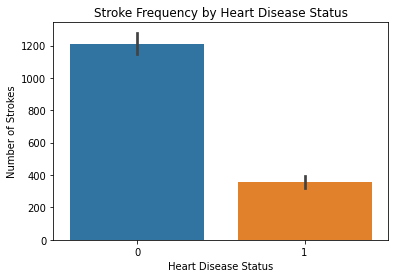

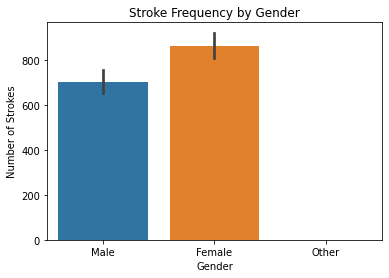

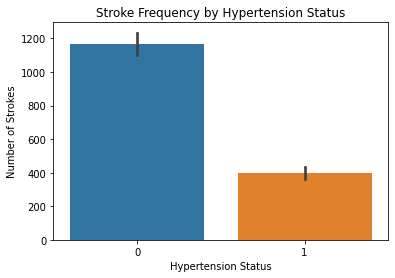

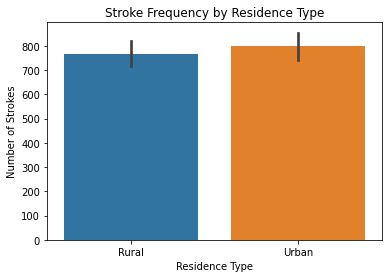

In [ ]:
sns.barplot(x='heart_disease', y='stroke', data=df, estimator=sum)
plt.title('Stroke Frequency by Heart Disease Status')
plt.xlabel('Heart Disease Status')
plt.ylabel('Number of Strokes')
plt.show()
sns.barplot(x='gender', y='stroke', data=df, estimator=sum)
plt.title('Stroke Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Strokes')
plt.show()
sns.barplot(x='hypertension', y='stroke', data=df, estimator=sum)
plt.title('Stroke Frequency by Hypertension Status')
plt.xlabel('Hypertension Status')
plt.ylabel('Number of Strokes')
plt.show()
sns.barplot(x='Residence_type', y='stroke', data=df, estimator=sum)
plt.title('Stroke Frequency by Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Number of Strokes')
plt.show()

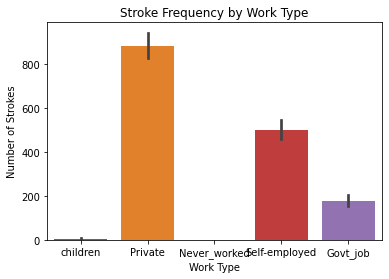

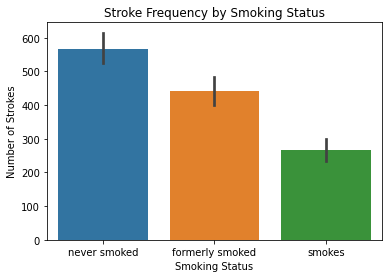

In [ ]:
sns.barplot(x='work_type', y='stroke', data=df, estimator=sum)
plt.title('Stroke Frequency by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Number of Strokes')
plt.show()
sns.barplot(x='smoking_status', y='stroke', data=df, estimator=sum)
plt.title('Stroke Frequency by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Number of Strokes')
plt.show()

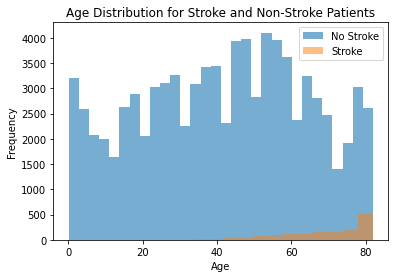

In [ ]:
stroke = df[df['stroke'] == 1]
no_stroke = df[df['stroke'] == 0]

# Plot the age distributions for stroke and non-stroke patients
plt.hist(no_stroke['age'], bins=30, alpha=0.6, label='No Stroke')
plt.hist(stroke['age'], bins=20, alpha=0.5, label='Stroke')
plt.title('Age Distribution for Stroke and Non-Stroke Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

In [ ]:
import plotly.express as px
fig = px.violin(df, x="stroke", y="age", color="stroke", box=True, points="all", hover_data=["gender", "hypertension", "heart_disease"],
                color_discrete_sequence=["#1f77b4", "#ff7f0e"])

# Customize the plot layout
fig.update_layout(
title={
        'text': "Stroke Probability by Age",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Stroke (1 = Yes)",
    yaxis_title="Age",

)

# Display the plot
fig.show()

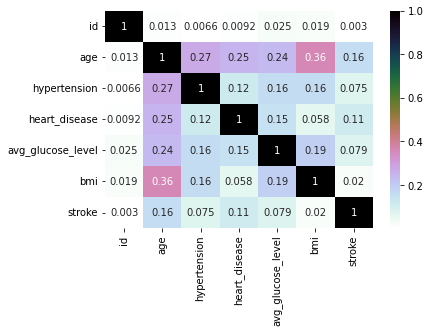

In [ ]:
# Create a correlation matrix
corr_matrix = df.corr()

# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='cubehelix_r')

# Show the plot
plt.show()

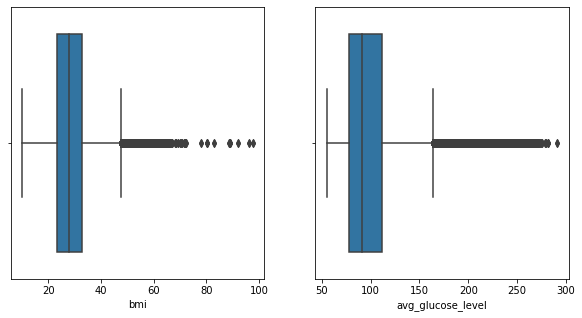

In [ ]:
# Create boxplots of BMI and Average_Glucose
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(x=df['bmi'], ax=axs[0])
sns.boxplot(x=df['avg_glucose_level'], ax=axs[1])
plt.show()

In [ ]:
print("Data dimension before removing outliers {}".format(df.shape))
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df[(df['avg_glucose_level'] < lower_bound) | (df['avg_glucose_level'] > upper_bound)]
df = df[(df['avg_glucose_level'] >= lower_bound) & (df['avg_glucose_level'] <= upper_bound)]

print("Data dimension after removing outliers {}".format(df.shape))

Data dimension before removing outliers (86800, 12)
Data dimension after removing outliers (76844, 12)


In [ ]:
bmi_mean=df['bmi'].mean()
df['bmi']=df['bmi'].fillna(bmi_mean).round(1)
df['bmi'].isnull().sum()

<ipython-input-33-f286ce6c8d9d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0

In [ ]:
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [ ]:
object_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in object_cols:
    df[col] = le.fit_transform(df[col])

<ipython-input-35-84c93823c627>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,3,0
1,30468,1,58.0,1,0,1,2,1,87.96,39.2,1,0
2,16523,0,8.0,0,0,0,2,1,110.89,17.6,3,0
3,56543,0,70.0,0,0,1,2,0,69.04,35.9,0,0
4,46136,1,14.0,0,0,0,1,0,161.28,19.1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76844 entries, 0 to 86799
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 76844 non-null  int64  
 1   gender             76844 non-null  int64  
 2   age                76844 non-null  float64
 3   hypertension       76844 non-null  int64  
 4   heart_disease      76844 non-null  int64  
 5   ever_married       76844 non-null  int64  
 6   work_type          76844 non-null  int64  
 7   Residence_type     76844 non-null  int64  
 8   avg_glucose_level  76844 non-null  float64
 9   bmi                76844 non-null  float64
 10  smoking_status     76844 non-null  int64  
 11  stroke             76844 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 7.6 MB


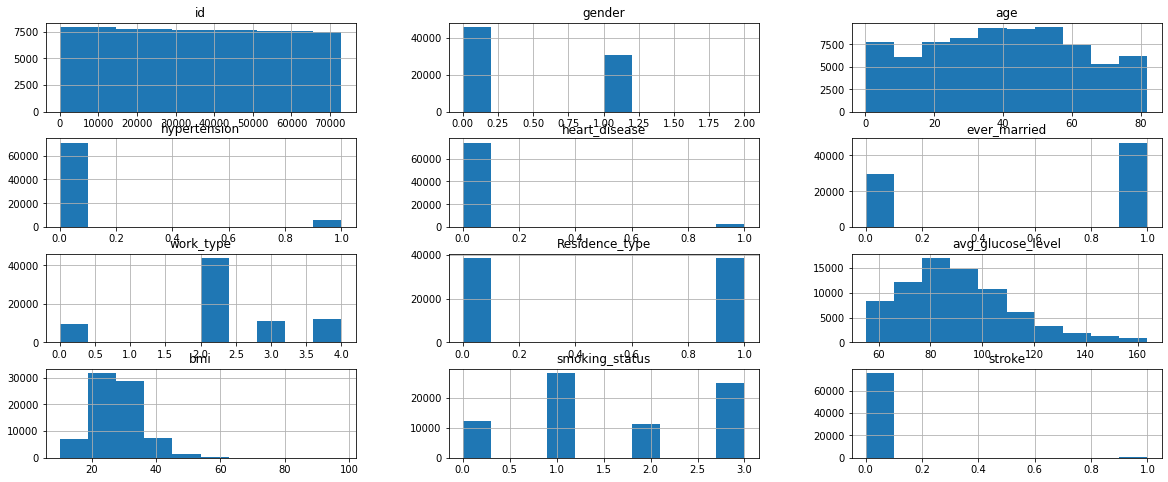

In [ ]:
df.hist(figsize=(20,8))
plt.show()

In [ ]:
x = df.drop("stroke",axis=1)
y = df["stroke"]

In [ ]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
lj = LogisticRegression(solver="liblinear").fit(xTrain,yTrain)
gnb = GaussianNB().fit(xTrain,yTrain)
knnc = KNeighborsClassifier().fit(xTrain,yTrain)
cartc = DecisionTreeClassifier(random_state=42).fit(xTrain,yTrain)
rfc = RandomForestClassifier(random_state=42,verbose=False).fit(xTrain,yTrain)
gbmc = GradientBoostingClassifier(verbose=False).fit(xTrain,yTrain)
xgbc = XGBClassifier().fit(xTrain,yTrain)
lgbmc = LGBMClassifier().fit(xTrain,yTrain)

In [ ]:
modelsc = [lj,gnb,knnc,cartc,rfc,gbmc,xgbc,lgbmc]

In [ ]:
for model in modelsc:
    name = model.__class__.__name__
    predict = model.predict(xTest)
    R2CV = cross_val_score(model,xTest,yTest,cv=10,verbose=False).mean()
    error = -cross_val_score(model,xTest,yTest,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
    roc = roc_curve(yTest,predict)
    print(name + ": ")
    print("-" * 10)
    print("ACC-->",accuracy_score(yTest,predict))
    print("R2CV-->",R2CV)
    print("MEAN SQUARED ERROR-->",np.sqrt(error))
    print("ROC-->",roc)
    print("-" * 30)

LogisticRegression: 
----------
ACC--> 0.9870907292696892
R2CV--> 0.9870907343718937
MEAN SQUARED ERROR--> 0.11361894924750116
ROC--> (array([0., 1.]), array([0., 1.]), array([1, 0]))
------------------------------
GaussianNB: 
----------
ACC--> 0.9870907292696892
R2CV--> 0.9870907343718937
MEAN SQUARED ERROR--> 0.11361894924750116
ROC--> (array([0., 1.]), array([0., 1.]), array([1, 0]))
------------------------------
KNeighborsClassifier: 
----------
ACC--> 0.9871427827806986
R2CV--> 0.9868304532683018
MEAN SQUARED ERROR--> 0.11475864556406251
ROC--> (array([0.00000000e+00, 2.10937088e-04, 1.00000000e+00]), array([0.        , 0.02016129, 1.        ]), array([2, 1, 0]))
------------------------------
DecisionTreeClassifier: 
----------
ACC--> 0.993441257612826
R2CV--> 0.9798554613800802
MEAN SQUARED ERROR--> 0.14193145747127275
ROC--> (array([0.        , 0.00358593, 1.        ]), array([0.        , 0.76612903, 1.        ]), array([2, 1, 0]))
------------------------------
RandomForestC

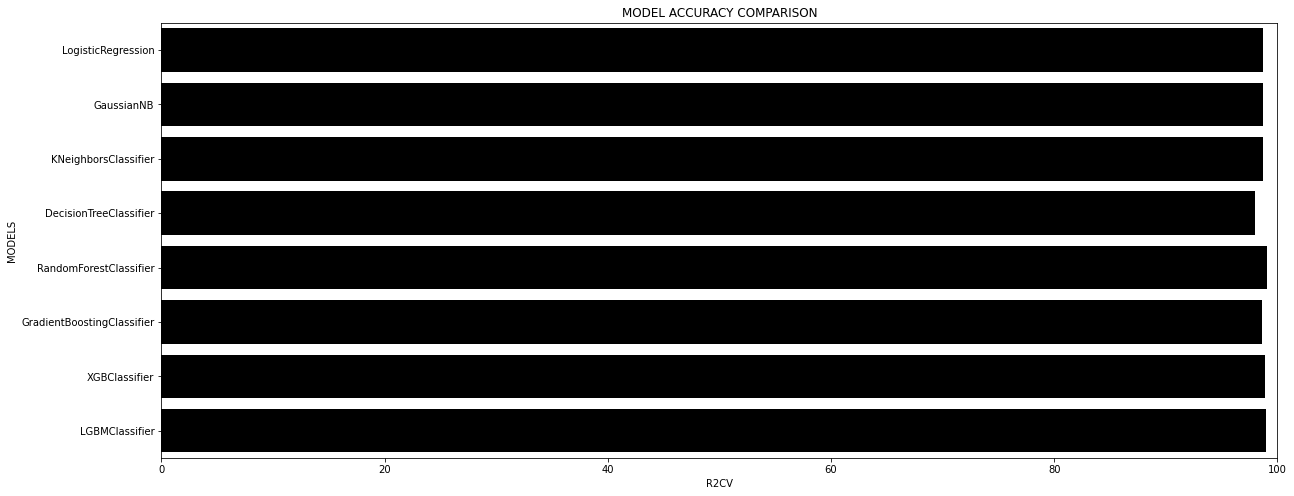

In [ ]:
r = pd.DataFrame(columns=["MODELS","R2CV"])
for model in modelsc:
    name = model.__class__.__name__
    R2CV = cross_val_score(model,xTest,yTest,cv=10,verbose=False).mean()
    result = pd.DataFrame([[name,R2CV*100]],columns=["MODELS","R2CV"])
    r = r.append(result)

figure = plt.figure(figsize=(20,8))
sns.barplot(x="R2CV",y="MODELS",data=r,color="k")
plt.xlabel("R2CV")
plt.ylabel("MODELS")
plt.xlim(0,100)
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

In [ ]:
scaler = StandardScaler().fit(xTrain,yTrain)
xRTrain = scaler.transform(xTrain)
xRTest = scaler.transform(xTest)

In [ ]:
mlpc = MLPClassifier().fit(xRTrain,yTrain)
predict = mlpc.predict(xRTest)

R2CV = cross_val_score(mlpc,xRTest,yTest,cv=10).mean()
error = -cross_val_score(mlpc,xRTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(error))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

0.11633534799159159


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [ ]:
print(R2CV)
print(np.sqrt(error))

0.9869345657097386
0.11633534799159159


In [ ]:
loj = sm.Logit(yTrain,xTrain).fit()
print(loj.summary())

Optimization terminated successfully.
         Current function value: 0.066850
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                57633
Model:                          Logit   Df Residuals:                    57622
Method:                           MLE   Df Model:                           10
Date:                Wed, 01 Mar 2023   Pseudo R-squ.:                 0.09714
Time:                        07:18:11   Log-Likelihood:                -3852.8
converged:                       True   LL-Null:                       -4267.3
Covariance Type:            nonrobust   LLR p-value:                1.195e-171
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
id                -1.034e-05   1.61e-06     -6.422      0.000   -1.35e-05   -7.19e-06
gender  

In [ ]:
params = {"max_depth": [2, 5, 8, 10],
          "max_features": [2, 5, 8],
          "n_estimators": [10, 500, 1000],
          "min_samples_split": [2, 5, 10]}

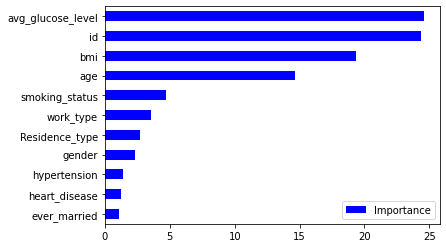

In [ ]:
Importance = pd.DataFrame({"Importance": rfc.feature_importances_ * 100},
                          index=xTrain.columns)


Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color="b")
plt.show()